In [2]:
!pip install --upgrade tensorflow

In [3]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [4]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

shape of x:  (1, 224, 224, 3)
data type:  float32


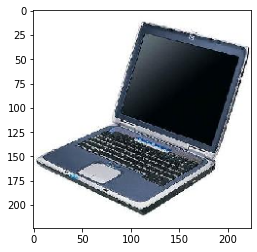

In [39]:
img, x = load_image("./101_ObjectCategories/laptop/image_0001.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)



In [9]:
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

1/1 [==============================] - 1s 1s/step
predicted reflex_camera with probability 0.934
predicted lens_cap with probability 0.036
predicted binoculars with probability 0.013
predicted gasmask with probability 0.006
predicted tripod with probability 0.005


In [10]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

1/1 [==============================] - 1s 1s/step


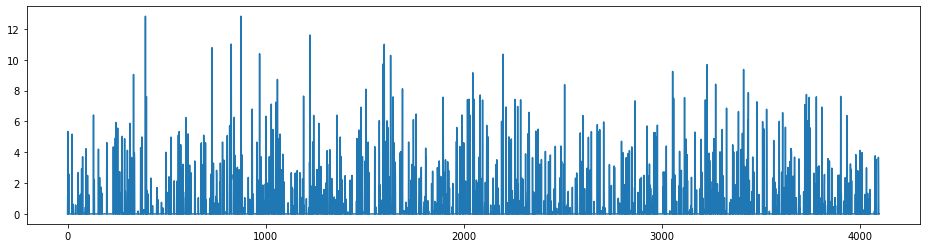

In [40]:
img, x = load_image("./101_ObjectCategories/laptop/image_0001.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [15]:
import time
import random
images_path = './101_ObjectCategories'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

tick=time.time()

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 9144 images to analyze


In [18]:
tic=time.time()
features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.time()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.time()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 9144. Time: 0.7628 seconds.
1/1 [==============================] - 0s 375ms/step
analyzing image 500 / 9144. Time: 300.5223 seconds.
1/1 [==============================] - 0s 382ms/step
analyzing image 1000 / 9144. Time: 229.3200 seconds.
1/1 [==============================] - 0s 396ms/step
analyzing image 1500 / 9144. Time: 237.8550 seconds.
1/1 [==============================] - 0s 391ms/step
analyzing image 2000 / 9144. Time: 242.4103 seconds.
1/1 [==============================] - 1s 625ms/step
analyzing image 2500 / 9144. Time: 342.0032 seconds.
1/1 [==============================] - 1s 678ms/step
analyzing image 3000 / 9144. Time: 376.0610 seconds.
1/1 [==============================] - 1s 719ms/step
analyzing image 3500 / 9144. Time: 395.0679 seconds.
1/1 [==============================] - 1s 750ms/step
analyzing image 4000 / 9144. Time: 410.1683 seconds.
1/1 [==============================] - 1s 824ms/step
analyzing image 4500 / 9144. Time: 422.4007 seconds.

In [22]:
!pip install scikit-learn

     ---------------------------------------- 7.4/7.4 MB 499.5 kB/s eta 0:00:00
     ------------------------------------ 307.0/307.0 kB 703.1 kB/s eta 0:00:00


In [25]:
import sklearn
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

PCA(n_components=300)

In [26]:
pca_features = pca.transform(features)

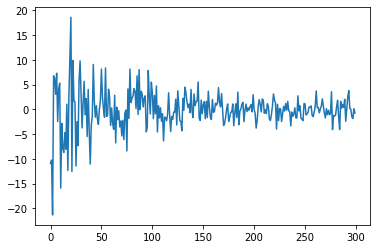

In [27]:
plt.plot(pca_features[2])

In [41]:
tock= time.time()
print(tock-tick)

59500.8527264595


In [42]:
from scipy.spatial import distance

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

In [48]:
def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

1/1 [==============================] - 1s 1s/step


Text(0.5, 1.0, 'result images')

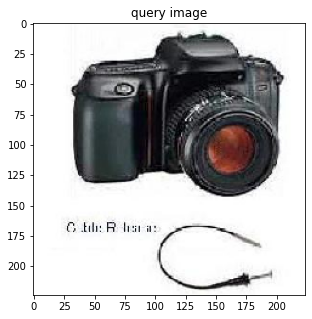

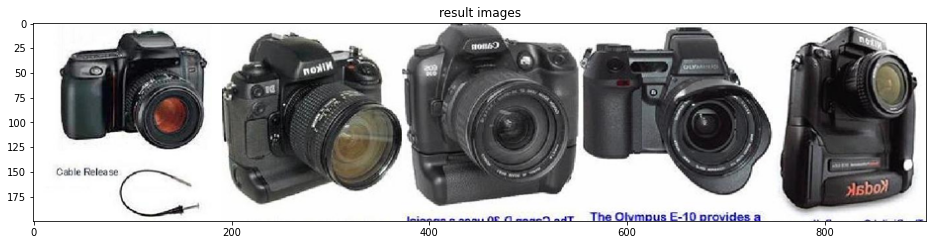

In [49]:
new_image, x = load_image("./101_ObjectCategories/camera/image_0001.jpg")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")